In [7]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [8]:
df = pd.read_csv('iris.csv')

In [9]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['variety'] = encoder.fit_transform(df['variety'])

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Splitting the data into train and test sets
X = df.drop("variety",axis=1)
y = df["variety"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)


In [14]:
# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(criterion="gini" , max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 4.6\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.375, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [0, 7, 3]'),
 Text(0.75, 0.375, 'x[3] <= 1.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.125, 'gini = 0.18\nsamples = 10\nvalue = [0, 1, 9]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]')]

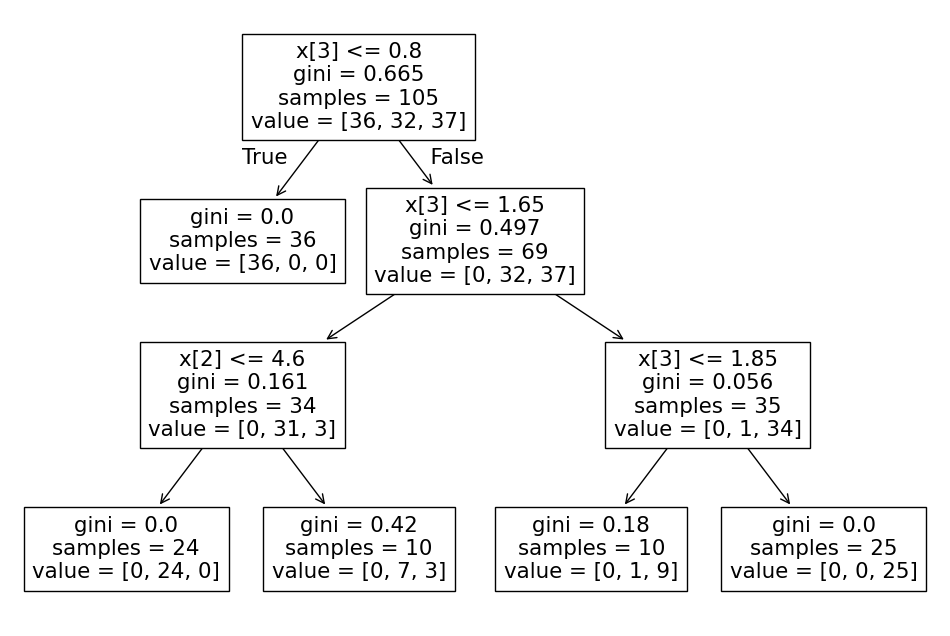

In [16]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt.fit(X_train, y_train)) 

Performance Metrices

In [25]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score,precision_score,roc_curve , roc_auc_score
y_pred_train = dt.predict(X_train) 
y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree-Train  (Validation Accuracy): ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: (Model Accuracy) ', accuracy_score(y_pred, y_test))


Accuracy of Decision Tree-Train  (Validation Accuracy):  0.9619047619047619
Accuracy of Decision Tree-Test: (Model Accuracy)  0.9555555555555556


Accuracy of Decision Tree-Train  (Validation Accuracy):  0.9619047619047619





Accuracy of Decision Tree-Test: (Model Accuracy)  0.9555555555555556

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [23]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[36  0  0]
 [ 0 31  1]
 [ 0  3 34]]

 Confusion Matrix - Test: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
